In [67]:
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from lightly.transforms import utils
from lightly.data import LightlyDataset
from sklearn.preprocessing import normalize
import json

from lightly.loss import NTXentLoss
from lightly.models.modules.heads import SimCLRProjectionHead
import torch
import torch.nn as nn
import torchvision
import pytorch_lightning as pl
import re

In [68]:
%run model.py
%run utils.py

In [69]:
path_to_data = "data/train"

In [70]:
def tsne(embeddings):

    tsne = TSNE(
        n_components=2,    
        perplexity=30,    
        learning_rate=200,
        max_iter=1000,
        random_state=42
    )

    embeddings = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(4, 3))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], s=50, alpha=0.7)
    plt.title("t-SNE of embeddings")
    plt.show()

In [71]:
def loss(losses):
    epochs = range(1, len(losses) + 1)
    
    plt.figure(figsize=(4, 3))
    plt.plot(epochs, losses, marker='o', linestyle='-')
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

In [72]:
def results(model_path, input_size):
    test_transform = torchvision.transforms.Compose(
        [
            torchvision.transforms.Resize((input_size, input_size)),
            torchvision.transforms.ToTensor(),
            torchvision.transforms.Normalize(
                mean=utils.IMAGENET_NORMALIZE["mean"],
                std=utils.IMAGENET_NORMALIZE["std"],
            ),
        ]
    )
    dataset_test = LightlyDataset(input_dir=path_to_data, transform=test_transform)
    dataloader_test = torch.utils.data.DataLoader(
        dataset_test,  # type: ignore
        batch_size=16,
        shuffle=False,
        drop_last=False,
        num_workers=8,
    )
    model = SimCLRModel.load_from_checkpoint(f"saved/{model_path}.ckpt")
    model.eval()
    model.freeze()
    embeddings, filenames = generate_embeddings(model, dataloader_test)

    with open(f"metrics/{model_path}.json", "r") as file:
        train_metrics = json.load(file)
    loss(train_metrics["losses"])
    tsne(embeddings)
    print("End loss: ", train_metrics["losses"][-1])

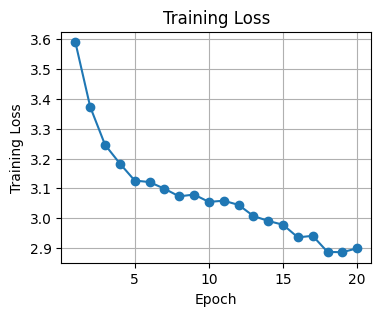

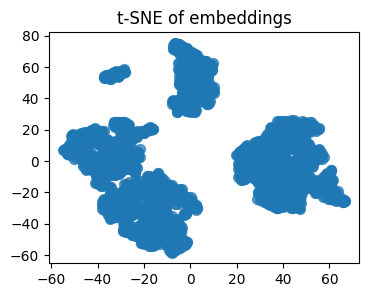

End loss:  2.8989124298095703


In [74]:
results("model_16_128_0.0005_20", input_size=128)

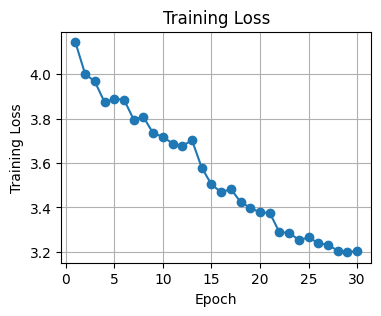

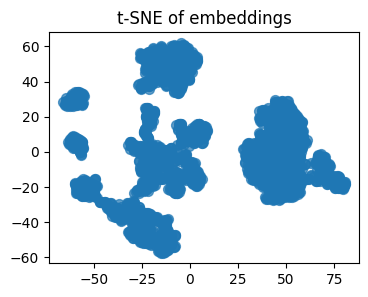

End loss:  3.2040300369262695


In [75]:
results("model_32_128_5e-05_30", input_size=128)